# Assessing Sea Ice Timeseries Trends
In this notebook, you'll learn to assess trends in timeseries in passive microwave sea ice data available from the National Snow and Ice Data Center.

This notebook has three components:
1. Generate a monthly timeseries of sea ice area from 1979 to present
2. Analyze trends of sea ice area during the September sea ice minimum
3. Compute the trend in sea ice in a given area

## Setup

### Import the modules for this notebook

In [1]:
# import numpy, matplotlib, netCDF4, os, and datetime
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import datetime as dt

### Define a data path and download the data
In this box below, define a `file_folder` where you will download the sea ice data. Then, use the **Downloading Data from NSIDC** data to obtain the level 3 sea ice data for the Northern Hemisphere, available here: https://noaadata.apps.nsidc.org/NOAA/G02202_V4/north/monthly/ 

In [2]:
# define a path to your raster files folder 
file_folder = "D:\Remote sensing\Lab_8\Data"

# Part 1: Generating a timeseries of sea ice data
Before reading in all of the data in a loop, it's helpful to open up a single file and see what's inside. Use the Panoply program to get a list of the variables and determine the name of the sea ice variable will be useful for generating a timeseries of sea ice area.

### Explore a file
After determining which variable will be used for the sea ice area calculation, read in the grid into an array

In [13]:
# make a file path to one of the nc files
file_path = os.path.join(file_folder, 'seaice_conc_monthly_nh_197906_n07_v04r00.nc' )

# open the file and read in the sea ice variable to a 2D numpy grid
ds = nc4.Dataset(file_path)
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close()

# print the minimum and maximum of the grid
print(np.min(sea_ice))
print(np.max(sea_ice))

0.0
254.0


Sea ice concentration is supposed to be in the range 0-1. What's going on here? To get a sense of this data, it helps to have a visual.

### Make a histogram

A historgram will give us a sense of where our data lies. 

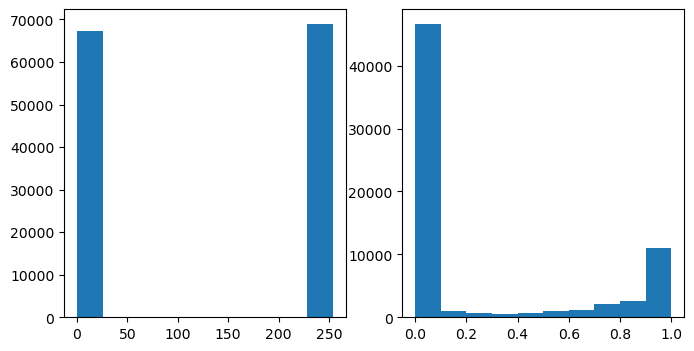

In [23]:
# ravel the seaice data - the histogram plotting function needs a 1D array
sea_ice_raveled = sea_ice.ravel()

# make a figure object
plt.figure(figsize = (8,4))

# plot a histogram of the data and add a title
plt.subplot(1,2,1)
plt.hist(sea_ice_raveled)

# create a filtered version of the data
sea_ice_filtered = sea_ice_raveled[sea_ice_raveled < 2]

# plot a histogram of the filtered data and add a title
plt.subplot(1,2,2) #two plots on one (row,col,place)
plt.hist(sea_ice_filtered)

# show the figure
plt.show()

### Compute the total sea ice area for the test file

In [26]:
# Find the number of points with a sea ice fraction greater than 15%
extent = len(sea_ice_filtered[sea_ice_filtered > 0.15])

# Convert to area (in km^2) assuming a grid resolution of 25 km by 25 km
area = np.sum(sea_ice_filtered * 25 * 25)

# print the sea ice area
print('extent = '+str(round(extent))+' km^2')
print('area = '+str(round(area))+' km^2')

extent = 20098 km^2
area = 10279026 km^2


### Make a timeseries from the sea ice area

In [41]:
# make a sorted file list of all the sea ice nc files
file_list_sea_ice = []

# write a for loop to loop through the files
for file_name_sea_ice in os.listdir(file_folder):
    if file_name_sea_ice[-3:] == '.nc':
        if 'seaice' in file_name_sea_ice:
            file_list_sea_ice.append(file_name_sea_ice) #don't really need the if seaice but im keeping it

# sort the file list
file_list_sea_ice.sort()

# Make empty lists to store dates and sea ice values
date_list = []
seaice_values = []

# # loop through all of the files in the file list
for file_name_sea_ice in file_list_sea_ice:
    # Split the file name and retrieve the year and month strings
    file_parts = file_name_sea_ice.split('_')
    year = file_parts[4][:4]  # First 4 characters are the year
    month = file_parts[4][4:6]  # Characters 5 and 6 are the month
    
    # Make a string for the middle day of the month (15)
    day = '01'
    
    # Join the year, month, and day strings with dashes and add to the date_list
    date_string = year + '-' + month + '-' + day 

    # make a file path to one of the nc files
    file_path = os.path.join(file_folder, file_name_sea_ice)

    # open the file and read in the sea ice variable to a 2D numpy grid
    ds = nc4.Dataset(file_path)
    sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
    ds.close()

    # compute the total area of seaice in this grid
    sea_ice_raveled = sea_ice.ravel()
    sea_ice_filtered = sea_ice_raveled[sea_ice_raveled < 2]
    area=np.sum(sea_ice_filtered*25*25)
    # if the sea ice area value is valid (>0), add the date to the date list
    # and the value to the value list 
    if area > 0: 
        date_list.append(date_string)
        seaice_values.append(area)

# After the loop, convert the date_list to a NumPy array with dtype='datetime64'
date_array = np.array(date_list, dtype='datetime64')


## Plot the seaice timeseries

<function matplotlib.pyplot.show(close=None, block=None)>

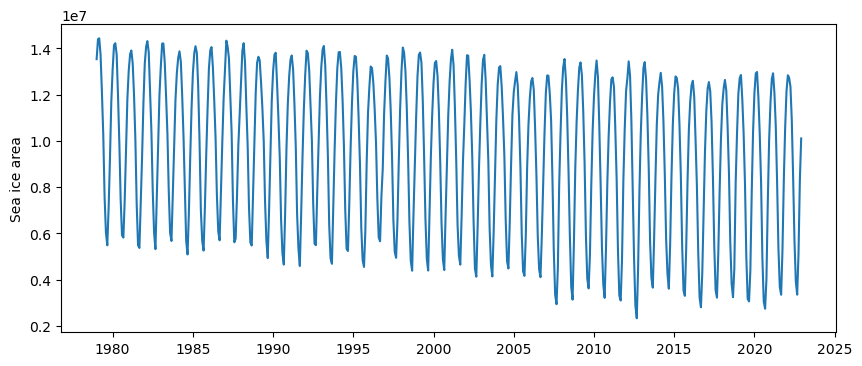

In [43]:
# make a figure object with a width of 10 and a height of 4
fig = plt.figure(figsize=(10,4))

# make a plot of the sea ice values vs the date array
plt.plot(date_array, seaice_values)

# label the y axis
plt.ylabel('Sea ice area')


# make a grid


# show the figure
plt.show

# Part 2: Analyze trends in sea ice in September
The extent of sea ice at the September seaice minimum is the an important metric of overall sea ice health as well as for commerce.

## Filtering the seaice trend by month

In [52]:
# make lists for sept dates and values
sept_dates = []
sept_values = []

# loop through the full date array
for i in range(len(date_array)):
    
    date = date_array[i]
    value = seaice_values[i]
    
    # convert the date to a datetime object
    date_datetime = date.astype(dt.datetime)
    
    # if the month is September, add it and its value to the list
    if date_datetime.month == 9: #in[3,4,5]
        sept_dates.append(date)
        sept_values.append(value)
        

## Plot the filtered timeseries

<function matplotlib.pyplot.show(close=None, block=None)>

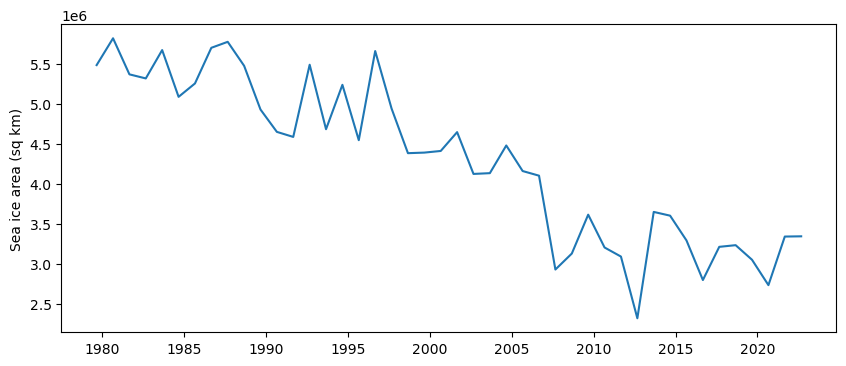

In [55]:
# make a figure object with a width of 10 and a height of 4
fig = plt.figure(figsize=(10,4))

# make a plot of the sea ice values vs the date array
plt.plot(sept_dates, sept_values)

# label the y axis
plt.ylabel('Sea ice area (sq km)')


# make a grid


# show the figure
plt.show


## Define a function for decimal years


In [56]:
# define a function to turn a date, given by year, month, and day, into a decimal year
def YMD_to_DecYr(year,month,day):
    
    # define a date object using the datetime module
    date = dt.datetime(year,month,day)

    # define the start in ordinal units (days since ...)
    start = dt.date(date.year, 1, 1).toordinal()

    # compute the year_length in ordinal units (365 or 366)
    year_length = dt.date(date.year+1, 1, 1).toordinal() - start

    # compute the fraction based on the date
    decimal_fraction = float(date.toordinal() - start) / year_length

    # compute the decimal year
    dec_yr = year+decimal_fraction
    return(dec_yr)
    

Test the decimal year function:

In [57]:
# test your function below:
print(YMD_to_DecYr(2000,1,1))   # January 1, 2000
print(YMD_to_DecYr(2000,6,8))   # June 8, 2000
print(YMD_to_DecYr(2000,12,7))  # December 7, 2000
#allows you to compute trends, like make a function 

2000.0
2000.4344262295083
2000.931693989071


## Make a decimal year array for the September values

In [59]:
# make an empty list for the decimal years
sept_decyrs = []

# loop through the sept date values and fill in the decimal years list
for date in sept_dates:
    year = int(str(date) [:4])
    month = int(str(date) [5:7])
    day = int(str(date) [8:10])
    decyr = YMD_to_DecYr(year,month,day)
    sept_decyrs.append(decyr)

print(sept_decyrs)

[1979.6657534246576, 1980.6666666666667, 1981.6657534246576, 1982.6657534246576, 1983.6657534246576, 1984.6666666666667, 1985.6657534246576, 1986.6657534246576, 1987.6657534246576, 1988.6666666666667, 1989.6657534246576, 1990.6657534246576, 1991.6657534246576, 1992.6666666666667, 1993.6657534246576, 1994.6657534246576, 1995.6657534246576, 1996.6666666666667, 1997.6657534246576, 1998.6657534246576, 1999.6657534246576, 2000.6666666666667, 2001.6657534246576, 2002.6657534246576, 2003.6657534246576, 2004.6666666666667, 2005.6657534246576, 2006.6657534246576, 2007.6657534246576, 2008.6666666666667, 2009.6657534246576, 2010.6657534246576, 2011.6657534246576, 2012.6666666666667, 2013.6657534246576, 2014.6657534246576, 2015.6657534246576, 2016.6666666666667, 2017.6657534246576, 2018.6657534246576, 2019.6657534246576, 2020.6666666666667, 2021.6657534246576, 2022.6657534246576]


## Compute the best fit line

In [63]:
# use numpy's polyfit function to compute the best fit line
p = np.polyfit(sept_decyrs, sept_values, 1)
print(p)

# the slope value is the first value
slope = p[0]

# the intercept is the second value
intercept = p[1]

# compute the values of the best fit line 
# for the september decyr values
best_fit_line = slope*np.array(sept_decyrs) + intercept


[-7.07122321e+04  1.45802377e+08]


## Create the plot with the line of best fit

<function matplotlib.pyplot.show(close=None, block=None)>

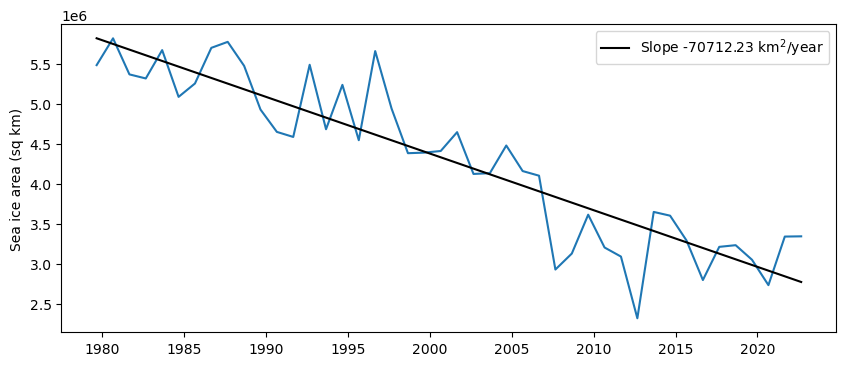

In [78]:
# make a figure object with a width of 10 and a height of 4
fig = plt.figure(figsize=(10,4))

# make a plot of the sea ice values vs the date array
plt.plot(sept_dates, sept_values)

# label the y axis
plt.ylabel('Sea ice area (sq km)')

#line of best fit
plt.plot(sept_dates, best_fit_line, 'k-', 
         label = 'Slope ' + '{:.2f}'.format(slope)+ ' km$^2$/year')

#legend 
plt.legend()

# show the figure
plt.show

# Part 3: Computing a regional sea ice timeseries

The region north of Greenland is the location of the thickest sea ice in the Arctic.

Open QGIS and add the global coastline. Then, change your projection to the projection of the sea ice data. Then, find the bounds of your box in the projected coordinates.

In [82]:
# define the bounds of the box north of the Fram Strait near Greenland and Svalbard
min_x = 403084
min_y = -682722
max_x = 928741
max_y = -276082

In [83]:
# make a file path to one of the nc files
file_path = os.path.join(file_folder, 'seaice_conc_monthly_nh_197906_n07_v04r00.nc' )

# open the file and read in the sea ice variable to a 2D numpy grid
ds = nc4.Dataset(file_path)
x = np.array(ds.variables['xgrid'])
y = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close()


In [89]:
# find the indices of the box bounds in the x and y grids
min_col = np.argmin(np.abs(x-min_x))
max_col = np.argmin(np.abs(x-max_x))
max_row = np.argmin(np.abs(y-min_y))
min_row = np.argmin(np.abs(y-max_y))
# print the indices to be sure these are ordered correctly
print("min_col", min_col)
print("max_col", max_col)
print("min_row", min_row)
print("max_row", max_row)

min_col 170
max_col 191
min_row 245
max_row 261


In [95]:
# open the file and read in the sea ice variable to a 2D numpy grid
ds = nc4.Dataset(file_path)
x = np.array(ds.variables['xgrid'])
y = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close()

# print the shape of the seaice grid 
print(np.shape(sea_ice))

# take only the "first timestep" of the seaice grid
sea_ice = sea_ice[0, :, :]

# subset the grid and find the area of sea ice in the subset
sea_ice_subset = sea_ice[min_row:max_row, min_col:max_col]

# print the shape of the seaice grid
print(np.shape(sea_ice_subset))

(1, 448, 304)
(16, 21)


## Revisit the sea ice timeseries loop to create a timeseries in the defined box

In [102]:

# Make empty lists to store dates and sea ice values
date_list = []
seaice_values = []

# # loop through all of the files in the file list
for file_name_sea_ice in file_list_sea_ice:
    # Split the file name and retrieve the year and month strings
    file_parts = file_name_sea_ice.split('_')
    year = file_parts[4][:4]  # First 4 characters are the year
    month = file_parts[4][4:6]  # Characters 5 and 6 are the month
    
    # Make a string for the middle day of the month (15)
    day = '01'
    
    # Join the year, month, and day strings with dashes and add to the date_list
    date_string = year + '-' + month + '-' + day 

    # make a file path to one of the nc files
    file_path = os.path.join(file_folder, file_name_sea_ice)

    # open the file and read in the sea ice variable to a 2D numpy grid
    ds = nc4.Dataset(file_path)
    sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
    ds.close()
    #does not incldue x and y because of chunk 42
    # take only the "first timestep" of the seaice grid
    sea_ice = sea_ice[0, :, :]

    # subset the grid and find the area of sea ice in the subset
    sea_ice_subset = sea_ice[min_row:max_row, min_col:max_col]

    # compute the total area of seaice in this grid
    sea_ice_raveled = sea_ice_subset.ravel()
    sea_ice_filtered = sea_ice_raveled[sea_ice_raveled < 2]
    area=np.sum(sea_ice_filtered*25*25)
    # if the sea ice area value is valid (>0), add the date to the date list
    # and the value to the value list 
    if area > 0: 
        date_list.append(date_string)
        seaice_values.append(area)



# After the loop, convert the date_list to a NumPy array with dtype='datetime64'
date_array = np.array(date_list, dtype='datetime64')


## Plot the timeseries in the box

<function matplotlib.pyplot.show(close=None, block=None)>

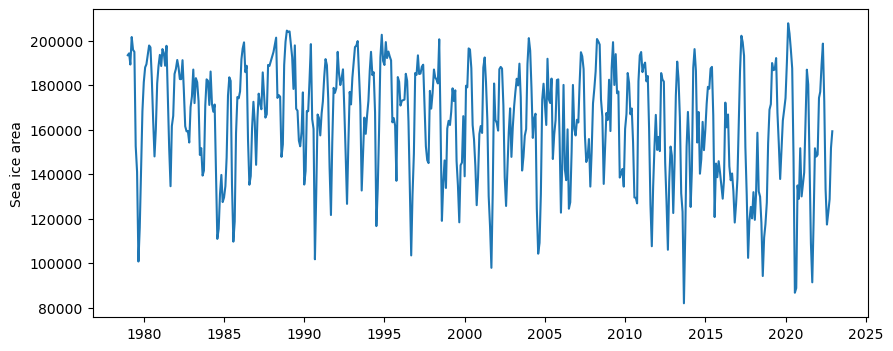

In [103]:
# make a figure object with a width of 10 and a height of 4
fig = plt.figure(figsize=(10,4))

# make a plot of the sea ice values vs the date array
plt.plot(date_array, seaice_values)

# label the y axis
plt.ylabel('Sea ice area')


# make a grid


# show the figure
plt.show

### Filter the timeseries to only include values in September

In [107]:
# make lists for sept dates and values
sept_dates = []
sept_values = []

# loop through the full date array
for i in range(len(date_array)):
    
    date = date_array[i]
    value = seaice_values[i]
    
    # convert the date to a datetime object
    date_datetime = date.astype(dt.datetime)
    
    # if the month is September, add it and its value to the list
    if date_datetime.month == 9: #in[3,4,5]
        sept_dates.append(date)
        sept_values.append(value)
        
#use the code above to filter the values to september
# make an empty list for the decimal years
sept_decyrs = []

# loop through the sept date values and fill in the decimal years list
for date in sept_dates:
    year = int(str(date) [:4])
    month = int(str(date) [5:7])
    day = int(str(date) [8:10])
    decyr = YMD_to_DecYr(year,month,day)
    sept_decyrs.append(decyr)

print(sept_decyrs)

[1979.6657534246576, 1980.6666666666667, 1981.6657534246576, 1982.6657534246576, 1983.6657534246576, 1984.6666666666667, 1985.6657534246576, 1986.6657534246576, 1987.6657534246576, 1988.6666666666667, 1989.6657534246576, 1990.6657534246576, 1991.6657534246576, 1992.6666666666667, 1993.6657534246576, 1994.6657534246576, 1995.6657534246576, 1996.6666666666667, 1997.6657534246576, 1998.6657534246576, 1999.6657534246576, 2000.6666666666667, 2001.6657534246576, 2002.6657534246576, 2003.6657534246576, 2004.6666666666667, 2005.6657534246576, 2006.6657534246576, 2007.6657534246576, 2008.6666666666667, 2009.6657534246576, 2010.6657534246576, 2011.6657534246576, 2012.6666666666667, 2013.6657534246576, 2014.6657534246576, 2015.6657534246576, 2016.6666666666667, 2017.6657534246576, 2018.6657534246576, 2019.6657534246576, 2020.6666666666667, 2021.6657534246576, 2022.6657534246576]


In [ ]:
# make an a list of decimal years


In [108]:
# compute the best fit line
# use numpy's polyfit function to compute the best fit line
p = np.polyfit(sept_decyrs, sept_values, 1)
print(p)

# the slope value is the first value
slope = p[0]

# the intercept is the second value
intercept = p[1]

# compute the values of the best fit line 
# for the september decyr values
best_fit_line = slope*np.array(sept_decyrs) + intercept


[-5.49488423e+02  1.23005277e+06]


<function matplotlib.pyplot.show(close=None, block=None)>

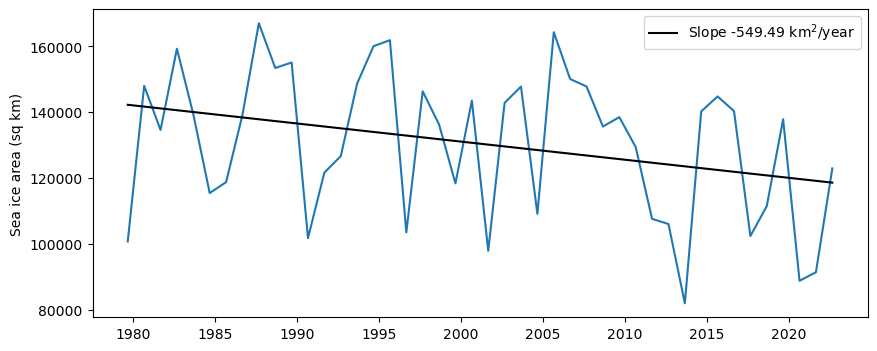

In [109]:
# make a figure with the best fit line plot on the subset
# make a figure object with a width of 10 and a height of 4
fig = plt.figure(figsize=(10,4))

# make a plot of the sea ice values vs the date array
plt.plot(sept_dates, sept_values)

# label the y axis
plt.ylabel('Sea ice area (sq km)')

#line of best fit
plt.plot(sept_dates, best_fit_line, 'k-', 
         label = 'Slope ' + '{:.2f}'.format(slope)+ ' km$^2$/year')

#legend 
plt.legend()

# show the figure
plt.show